# Bilibili ÊØèÂë®ÂøÖÁúãÊéíË°åÊ¶ú

## 1950083 Ëá™Âä®Âåñ ÂàòÊô∫ÂÆá

## 01 ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂåÖ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import os

import re  # ÂØºÂÖ•Ê≠£ÂàôË°®ËææÂºè

import requests
from bs4 import BeautifulSoup

import time

import jieba.analyse
import wordcloud
from PIL import Image



# ‰∏∫‰∫ÜÂú®Jupyter Notebook‰∏≠ÊòæÁ§∫ÂõæÁâáÁöÑÂøÖÈ°ªÈÖçÁΩÆÈ°π
%matplotlib inline
# Áî®ÂÖºÂÆπÂ≠ó‰ΩìËß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫‰∏∫ÊñπÊ†ºÁöÑÈóÆÈ¢ò
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'
# Ëß£ÂÜ≥‰øùÂ≠òÂõæÂÉèÊòØË¥üÂè∑'-'ÊòæÁ§∫‰∏∫ÊñπÂùóÁöÑÈóÆÈ¢ò
plt.rcParams['axes.unicode_minus'] = False

## 02 Â∏∏ÈáèÂÆö‰πâ & ÂÖ®Â±ÄÂèòÈáèÂÆö‰πâ

In [4]:
# Â∏∏ÈáèÂÆö‰πâ
# ÊéíË°åÊ¶úURL
# Ê≤°ÊúâÂÖ∑‰ΩìÊåáÂÆöÊéíË°åÊ¶úÊúüÊï∞Ôºå‰ºöË∑≥ËΩ¨Âà∞ÊúÄÊñ∞ÁöÑÊéíË°åÊ¶ú
RankBoardJsonRequestUrlPrefix = 'https://api.bilibili.com/x/web-interface/popular/series/one?number='
LatestRankBoardID = 167  # biblibiliÊéíË°åÊ¶úÊúÄÊñ∞ÊúüÊï∞

# ÊµèËßàÂô®ËØ∑Ê±ÇÂ§¥
RequestHeader = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"}
# Êñá‰ª∂Â≠òÂÇ®Ë∑ØÂæÑ
RankBoardsDatabasePath = r'Databases\rankboards.csv'
UsersDatabasePath = r'Databases\users.csv'
VideosDatabasePath = r'Databases\videos.csv'

SeparateBar = "--------------------------------------------------"

# ÂÖ®Â±ÄÂèòÈáèÂÆö‰πâ
# VideoList = []
# UserList = []
# BoardList = []


## 03 Á±ªÂÆö‰πâ

In [3]:
# BÁ´ôËßÜÈ¢ëÁ±ª
class VideoClass():
    def __init__(self, videoUrl):
        self.videoBVID = None
        self.videoCID = 0
        self.videoName = None
        self.videoOwnerID = 0
        self.videoUrl = videoUrl
        self.videoViews = 0
        self.videoDanmaku = 0
        self.videoLength = 0
        self.videoLikes = 0
        self.videoCoins = 0
        self.videoFavorites = 0
        self.videoComments = 0
        self.videoShares = 0
        self.videoRecommendReason = None
        self.videoTag = None
        self.videoReleaseTimeStamp = 0
        self.videoBoardID = 0
        self.videoBoardRank = 0

    def showVideoInfo(self):
        print("videoBVID            : ",self.videoBVID)
        print("videoCID             : ",self.videoCID)
        print("videoName            : ",self.videoName)
        print("videoOwnerID         : ",self.videoOwnerID)
        print("videoUrl             : ",self.videoUrl)
        print("videoViews           : ",self.videoViews)
        print("videoDanmaku         : ",self.videoDanmaku)
        print("videoLength          : ",self.videoLength)
        print("videoLikes           : ",self.videoLikes)
        print("videoCoins           : ",self.videoCoins)
        print("videoFavorites       : ",self.videoFavorites)
        print("videoComments        : ",self.videoComments)
        print("videoShares          : ",self.videoShares)
        print("videoRecommendReason : ",self.videoRecommendReason)
        print("videoTag             : ",self.videoTag)
        print("videoReleaseTimeStamp: ",self.videoReleaseTimeStamp)
        print("videoBoardID         : ",self.videoBoardID)
        print("videoBoardRank       : ",self.videoBoardRank)
    
    # Âú®Ëé∑ÂèñÂÆåBVIDÂíåCIDÂêéÂèØ‰ª•Ëé∑ÂèñËßÜÈ¢ëÈïøÂ∫¶
    def initVideoLength(self):
        videoPlayUrlPrefix = 'https://api.bilibili.com/x/player/playurl?cid='
        videoPlayUrlMidfix = '&bvid='
        fullVideoPlayJsonRequestUrl = videoPlayUrlPrefix + str(self.videoCID) + videoPlayUrlMidfix + str(self.videoBVID)
        videoPlayJson = requests.get(url=fullVideoPlayJsonRequestUrl, headers=RequestHeader).json()
        self.videoLength = videoPlayJson['data']['timelength']

    # ‰ªéÊéíË°åÊ¶úËøõË°åÂàùÂßãÂåñ
    def initVideoInfoFromBoard(self, videoBoardRank, boardJson, boardID):
        self.videoBoardRank = videoBoardRank + 1
        self.videoBVID = boardJson['data']['list'][videoBoardRank]['bvid']
        self.videoCID = boardJson['data']['list'][videoBoardRank]['cid']
        self.videoName = boardJson['data']['list'][videoBoardRank]['title']
        self.videoOwnerID = boardJson['data']['list'][videoBoardRank]['owner']['mid']
        self.videoViews = boardJson['data']['list'][videoBoardRank]['stat']['view']
        self.videoDanmaku = boardJson['data']['list'][videoBoardRank]['stat']['danmaku']
        self.videoReleaseTimeStamp = boardJson['data']['list'][videoBoardRank]['ctime']
        self.videoBoardID = boardID
        self.videoLikes = boardJson['data']['list'][videoBoardRank]['stat']['like']
        self.videoCoins = boardJson['data']['list'][videoBoardRank]['stat']['coin']
        self.videoFavorites = boardJson['data']['list'][videoBoardRank]['stat']['favorite']
        self.videoComments = boardJson['data']['list'][videoBoardRank]['stat']['reply']
        self.videoShares = boardJson['data']['list'][videoBoardRank]['stat']['share']
        self.videoRecommendReason = boardJson['data']['list'][videoBoardRank]['rcmd_reason']
        self.videoTag = boardJson['data']['list'][videoBoardRank]['tname']
        
    def initAllVideoInfo(self, videoBoardRank, boardJson, boardID):
        self.initVideoInfoFromBoard(videoBoardRank, boardJson, boardID)
        self.initVideoLength()
        self.saveOneselfToDatabase(databasePath=VideosDatabasePath)
        
    def saveOneselfToDatabase(self, databasePath):
        # write + text
        with open(file=databasePath, mode='a', encoding="utf-8", newline="") as databaseFile:
            databaseWriter = csv.writer(databaseFile)
            # Âà§Êñ≠Êñá‰ª∂ÂçÅÂàÜ‰∏∫Á©∫Ôºå‰∏∫Á©∫ÂàôÊ∑ªÂä†header
            if os.path.getsize(databasePath) == 0:
                print(databasePath, "is Empty. Do initialization.")
                databaseWriter.writerow(["videoBVID", "videoName", "videoOwnerID", "videoViews", "videoDanmaku", "videoLength", \
                                        "videoLikes", "videoCoins", "videoFavorites", "videoComments", "videoShares", \
                                        "videoRecommendReason", "videoTag", "videoReleaseTimeStamp", "videoBoardID" ,"videoBoardRank"])
            else:
                # print(databasePath, "is Not Empty.")
                pass

            # Â∞Ü‰ø°ÊÅØÂÜôÂÖ•database‰∏≠
            databaseWriter.writerow([self.videoBVID, self.videoName, self.videoOwnerID, self.videoViews, self.videoDanmaku, self.videoLength, \
                                    self.videoLikes, self.videoCoins, self.videoFavorites, self.videoComments, self.videoShares, \
                                    self.videoRecommendReason, self.videoTag, self.videoReleaseTimeStamp, self.videoBoardID ,self.videoBoardRank])
            
 

In [52]:
# BÁ´ôÁî®Êà∑Á±ª
class UserClass():
    # UserList = []
    def __init__(self, userVideoUrl):
        self.userID = 0
        self.userName = None
        # self.userVideoUrl = userVideoUrl
        # self.userMainPageUrl = None
        self.userFollows = 0
        self.userFans = 0
        self.userVideos = 0
        
    def showUserInfo(self):
        print("userID           : ",self.userID)
        print("userName         : ",self.userName)
        # print("userVideoUrl     : ",self.userVideoUrl)
        # print("userMainPageUrl  : ",self.userMainPageUrl)
        print("userFollows      : ",self.userFollows)
        print("userFans         : ",self.userFans)
        print("userVideos       : ",self.userVideos)
        

    def initAllUserInfo(self, videoBoardRank, boardJson):
        self.initPartUserInfoFromBoard(videoBoardRank, boardJson)
        self.initOtherUserInfo()
        # UserClass.UserList.append(self)
        # self.showUserInfo()
        self.saveOneselfToDatabase(databasePath=UsersDatabasePath)

    def initPartUserInfoFromBoard(self, videoBoardRank, boardJson):
        self.userID = boardJson['data']['list'][videoBoardRank]['owner']['mid']
        self.userName = boardJson['data']['list'][videoBoardRank]['owner']['name']
    
    def initOtherUserInfo(self):
        # userVideoResponse = requests.get(self.userVideoUrl, headers=RequestHeader)
        # print("video page status code   : ", userVideoResponse.status_code)
        # userVideoSoup = BeautifulSoup(userVideoResponse.text, 'html.parser')

        # # ÊúâÂèØËÉΩÊó†Ê≥ïÈÄöËøáËØ•ÊñπÊ≥ïËé∑ÂèñÁî®Êà∑‰∏ªÈ°µ‰ø°ÊÅØÔºåÊïÖÊ∑ªÂä†ÁâπÊÆäÂ§ÑÁêÜ
        # # ÂêéÁª≠ÊâæÂà∞ÂéüÂõ†ÊòØËÅîÂêàÊäïÁ®øÁöÑËßÜÈ¢ë‰∏éÂçï‰∫∫Âàõ‰ΩúÁöÑÁΩëÈ°µÊ†ºÂºè‰∏çÂêå
        # up_info_right = userVideoSoup.find('div', {'class':'up-info_right'})
        # if up_info_right is None:
        #     print("Can't get", self.userName, "'s MainPage url.")
        # else:
        #     self.userMainPageUrl = 'https:' + up_info_right.find('a').get('href')
        #     # print('userMainPageUrl          : ', self.userMainPageUrl)

        commonFollowFanRequestUrlPrefix = 'https://api.bilibili.com/x/relation/stat?vmid='
        commonFollowFanRequestUrlSuffix = '&jsonp=jsonp'
        fullFollowFanRequestUrl = commonFollowFanRequestUrlPrefix + str(self.userID) + commonFollowFanRequestUrlSuffix
        followFanJson =  requests.get(fullFollowFanRequestUrl, headers=RequestHeader).json()
        self.userFollows = followFanJson['data']['following']
        self.userFans = followFanJson['data']['follower']
        # commonFollowFanRequestUrlPrefix = 'https://api.bilibili.com/x/relation/stat?vmid='
        # commonFollowFanRequestUrlSuffix = '&jsonp=jsonp'
        commonUserWorkAmountRequestUrlPrefix = 'https://api.bilibili.com/x/space/navnum?mid='
        fullUserWorkAmountRequestUrl = commonUserWorkAmountRequestUrlPrefix + str(self.userID)
        userWorkAmountJson = requests.get(fullUserWorkAmountRequestUrl, headers=RequestHeader).json()
        self.userVideos = userWorkAmountJson['data']['video']

    def saveOneselfToDatabase(self, databasePath):
        with open(file=databasePath, mode='a', encoding="utf-8", newline="") as databaseFile:
            databaseWriter = csv.writer(databaseFile)
            # Âà§Êñ≠Êñá‰ª∂ÂçÅÂàÜ‰∏∫Á©∫Ôºå‰∏∫Á©∫ÂàôÊ∑ªÂä†header
            if os.path.getsize(databasePath) == 0:
                print(databasePath, "is Empty. Do initialization.")
                databaseWriter.writerow(["userID", "userName", "userFollows", "userFans", "userVideos"])
            else:
                # print(databasePath, "is Not Empty.")
                pass

            # Â∞Ü‰ø°ÊÅØÂÜôÂÖ•database‰∏≠
            databaseWriter.writerow([self.userID, self.userName, self.userFollows, self.userFans, self.userVideos])
            


In [53]:
# BÁ´ôÊéíË°åÊ¶úÁ±ª
class RankBoardClass():
    def __init__(self, boardJsonRequestUrl):
        self.boardJson = None
        self.boardID = None
        self.boardName = ""
        self.boardSubject = ""
        self.boardJsonRequestUrl = boardJsonRequestUrl
        self.boardEndTimeStamp = None
        self.boardLength = 0
        self.boardVideosAverageViews = 0.0
        self.boardVideosList = []
    
    def showBoardInfo(self):
        print("boardID                  : ",self.boardID)
        print("boardName                : ",self.boardName)
        print("boardSubject             : ",self.boardSubject)
        print("boardJsonRequestUrl      : ",self.boardJsonRequestUrl)
        print("boardEndTimeStamp        : ",self.boardEndTimeStamp)
        print("boardLength              : ",self.boardLength)
        print("boardVideosAverageViews  : ",self.boardVideosAverageViews)
        for idx in range(self.boardLength):
            print("boardVideosUrl[%3d]  : "%idx,self.boardVideosList[idx].videoName)
        
    # ÂàùÂßãÂåñÊéíË°åÊ¶ú‰ø°ÊÅØ
    def initBoardInfo(self):
        self.boardJson = requests.get(url=self.boardJsonRequestUrl,headers=RequestHeader).json()
        self.boardID = self.boardJson['data']['config']['number']
        self.boardName = self.boardJson['data']['config']['name']
        self.boardSubject = self.boardJson['data']['config']['subject']
        self.boardLength = len(self.boardJson['data']['list'])
        self.boardEndTimeStamp = self.boardJson['data']['config']['etime']
        self.addAllVideoToBoardList()
        self.addAllUsers()
        self.computeBoardVideosAverageViews()
        self.saveOneselfToDatabase(databasePath=RankBoardsDatabasePath)

    def addOneVideoToBoardList(self, videoRank):
        tempVideo = VideoClass(videoUrl=self.boardJson['data']['list'][videoRank]['short_link'])
        tempVideo.initAllVideoInfo(videoRank,self.boardJson,self.boardID)
        self.boardVideosList.append(tempVideo)
    
    # Ëé∑ÂèñËßÜÈ¢ëÂàóË°®
    def addAllVideoToBoardList(self):
        for videoRank in range(self.boardLength):
            self.addOneVideoToBoardList(videoRank)

    def computeBoardVideosAverageViews(self):
        sumViews = 0.0  # ÊÄªÊí≠ÊîæÈáè
        for video in self.boardVideosList:
            sumViews += video.videoViews
        self.boardVideosAverageViews = sumViews/self.boardLength

    # Â§ÑÁêÜÁî®Êà∑‰ø°ÊÅØ
    def addOneUser(self, videoRank):
        tempUser = UserClass(userVideoUrl=self.boardJson['data']['list'][videoRank]['short_link'])
        tempUser.initAllUserInfo(videoRank, self.boardJson)

    def addAllUsers(self):
        for videoRank in range(self.boardLength):
            self.addOneUser(videoRank)

    def saveOneselfToDatabase(self, databasePath):
        # write + text
        with open(file=databasePath, mode='a', encoding="utf-8", newline="\n") as databaseFile:
            databaseWriter = csv.writer(databaseFile)
            # Âà§Êñ≠Êñá‰ª∂ÂçÅÂàÜ‰∏∫Á©∫Ôºå‰∏∫Á©∫ÂàôÊ∑ªÂä†header
            if os.path.getsize(databasePath) == 0:
                print(databasePath, "is Empty. Do initialization.")
                databaseWriter.writerow(["boardID", "boardName", "boardSubject", "boardJsonRequestUrl", \
                                        "boardEndTimeStamp", "boardLength", "boardVideosAverageViews"])
            else:
                # print(databasePath, "is Not Empty.")
                pass

            # Â∞Ü‰ø°ÊÅØÂÜôÂÖ•database‰∏≠
            databaseWriter.writerow([self.boardID, self.boardName, self.boardSubject, self.boardJsonRequestUrl, \
                                    self.boardEndTimeStamp, self.boardLength, self.boardVideosAverageViews])

## 04 Ëé∑ÂèñÂÖ®ÈÉ®‰ø°ÊÅØ

In [54]:
def getOneRankBoardAllInfo(boardID):
    print(SeparateBar)
    print("Ëé∑ÂèñÁ¨¨%3dÊúüÊéíË°åÊ¶úÊï∞ÊçÆ‰ø°ÊÅØ"%(boardID))
    startTime = time.time()
    fullBoardJsonRequestUrl = RankBoardJsonRequestUrlPrefix + str(boardID)
    tempRankBoard = RankBoardClass(boardJsonRequestUrl=fullBoardJsonRequestUrl)
    tempRankBoard.initBoardInfo()  # InitÁöÑÊó∂ÂÄôËá™Âä®Â∞Ü‰ø°ÊÅØÂ≠òÂÖ•
    print("RankBoardName    :", tempRankBoard.boardName)
    print("RankBoardLEngth  :", tempRankBoard.boardLength)
    endTime = time.time()
    spendTime = endTime-startTime
    print("Ëé∑ÂèñÁ¨¨%3dÊéíË°åÊ¶úÊï∞ÊçÆ‰ø°ÊÅØÔºåËÄóÊó∂%.3fÁßí"%(boardID, spendTime))
    print(SeparateBar)
    return tempRankBoard

In [55]:
StartRankBoardID = 167
EndRankBoardID = 117
BoardIDList = [id for id in range(StartRankBoardID, EndRankBoardID, -1)]  
# ‰ªéstartÂà∞endÔºåÂ§ßÂåÖÊã¨ÔºåÂ∞è‰∏çÂåÖÊã¨
# print(len(BoardIDList))

# ÂÄíÂ∫èËé∑Âèñ
for boardID in BoardIDList:
    getOneRankBoardAllInfo(boardID=boardID)
    time.sleep(10)  # ËÆ©ÊúçÂä°Âô®‰ºëÊÅØ‰∏Ä‰ºö
# getOneRankBoardAllInfo(boardID=1)

--------------------------------------------------
Ëé∑ÂèñÁ¨¨117ÊúüÊéíË°åÊ¶úÊï∞ÊçÆ‰ø°ÊÅØ
RankBoardName    : 2021Á¨¨117Êúü 06.11 - 06.17
RankBoardLEngth  : 37
Ëé∑ÂèñÁ¨¨117ÊéíË°åÊ¶úÊï∞ÊçÆ‰ø°ÊÅØÔºåËÄóÊó∂13.802Áßí
--------------------------------------------------


## 05 ËØªÂèñÊï∞ÊçÆÈõÜ

In [5]:
rankBoardsDatabaseDF = pd.read_csv(filepath_or_buffer=RankBoardsDatabasePath, header=0, index_col=None)
usersDatabaseDF = pd.read_csv(filepath_or_buffer=UsersDatabasePath, header=0, index_col=None)
videosDatabaseDF = pd.read_csv(filepath_or_buffer=VideosDatabasePath, header=0, index_col=None)

In [5]:
print("rankBoardsDatabaseDF\n", rankBoardsDatabaseDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   boardID                  50 non-null     int64  
 1   boardName                50 non-null     object 
 2   boardSubject             50 non-null     object 
 3   boardJsonRequestUrl      50 non-null     object 
 4   boardEndTimeStamp        50 non-null     int64  
 5   boardLength              50 non-null     int64  
 6   boardVideosAverageViews  50 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ KB
rankBoardsDatabaseDF
 None


In [6]:
print("usersDatabaseDF\n", usersDatabaseDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       2093 non-null   int64 
 1   userName     2093 non-null   object
 2   userFollows  2093 non-null   int64 
 3   userFans     2093 non-null   int64 
 4   userVideos   2093 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 81.9+ KB
usersDatabaseDF
 None


In [7]:
print("videosDatabaseDF\n", videosDatabaseDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   videoBVID              2093 non-null   object
 1   videoName              2093 non-null   object
 2   videoOwnerID           2093 non-null   int64 
 3   videoViews             2093 non-null   int64 
 4   videoDanmaku           2093 non-null   int64 
 5   videoLength            2093 non-null   int64 
 6   videoLikes             2093 non-null   int64 
 7   videoCoins             2093 non-null   int64 
 8   videoFavorites         2093 non-null   int64 
 9   videoComments          2093 non-null   int64 
 10  videoShares            2093 non-null   int64 
 11  videoRecommendReason   2092 non-null   object
 12  videoTag               2093 non-null   object
 13  videoReleaseTimeStamp  2093 non-null   int64 
 14  videoBoardID           2093 non-null   int64 
 15  videoBoardRank       

## 06 Êï∞ÊçÆÂèØËßÜÂåñ

### ÊéíË°åÊ¶úÂàÜÊûê

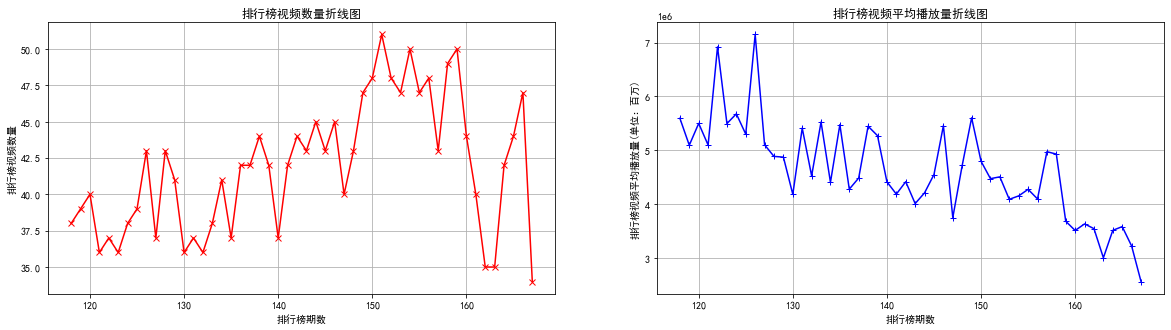

In [6]:
BoardIDs = rankBoardsDatabaseDF.loc[:, 'boardID']  # ÊéíË°åÊ¶úÊúüÊï∞
BoardLengths = rankBoardsDatabaseDF.loc[:, 'boardLength']  # ÊéíË°åÊ¶úÈïøÂ∫¶
BoardAverageViews = rankBoardsDatabaseDF.loc[:, 'boardVideosAverageViews']

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title("ÊéíË°åÊ¶úËßÜÈ¢ëÊï∞ÈáèÊäòÁ∫øÂõæ")
plt.xlabel("ÊéíË°åÊ¶úÊúüÊï∞")
plt.ylabel("ÊéíË°åÊ¶úËßÜÈ¢ëÊï∞Èáè")
plt.grid()
plt.plot(BoardIDs, BoardLengths, linestyle='-', color='red', marker='x', linewidth=1.5) # ËÆæÁΩÆÈ¢úËâ≤ÂèäÈÄèÊòéÂ∫¶


plt.subplot(1, 2, 2)
plt.title("ÊéíË°åÊ¶úËßÜÈ¢ëÂπ≥ÂùáÊí≠ÊîæÈáèÊäòÁ∫øÂõæ")
plt.xlabel("ÊéíË°åÊ¶úÊúüÊï∞")
plt.ylabel("ÊéíË°åÊ¶úËßÜÈ¢ëÂπ≥ÂùáÊí≠ÊîæÈáè(Âçï‰ΩçÔºöÁôæ‰∏á)")
plt.grid()
plt.plot(BoardIDs, BoardAverageViews, linestyle='-', color='blue', marker='+', linewidth=1.5) # ËÆæÁΩÆÈ¢úËâ≤ÂèäÈÄèÊòéÂ∫¶


### ËßÜÈ¢ëÊ†áÁ≠æÂàÜÊûê

Ê†áÁ≠æÊÄªÊï∞ :  80
{'ÂÖ∂‰ªñ': 671, 'ÊêûÁ¨ë': 224, 'ÂçïÊú∫Ê∏∏Êàè': 126, 'Êó•Â∏∏': 118, 'ÁæéÈ£üÂà∂‰Ωú': 107, 'Áü≠Áâá¬∑Êâã‰π¶¬∑ÈÖçÈü≥': 102, 'ÁªºÂêà': 90, 'ÊâãÊú∫Ê∏∏Êàè': 79, 'ÁîµÂ≠êÁ´ûÊäÄ': 75, 'ÁßëÂ≠¶ÁßëÊôÆ': 62, 'ÊâãÂ∑•': 52, '‰∫∫ÊñáÂéÜÂè≤': 51, 'ÁæéÈ£ü‰æ¶Êé¢': 50, 'ÂΩ±ËßÜÊùÇË∞à': 46, 'ÁøªÂî±': 39, 'È¨ºÁïúË∞ÉÊïô': 38, 'ÁªòÁîª': 35, 'ÂΩ±ËßÜÂâ™Ëæë': 34, 'ÊòéÊòüÁªºÂêà': 34, 'Êï∞Á†Å': 30, 'Á§æÁßë¬∑Ê≥ïÂæã¬∑ÂøÉÁêÜ': 30}
--------------------------------------------------


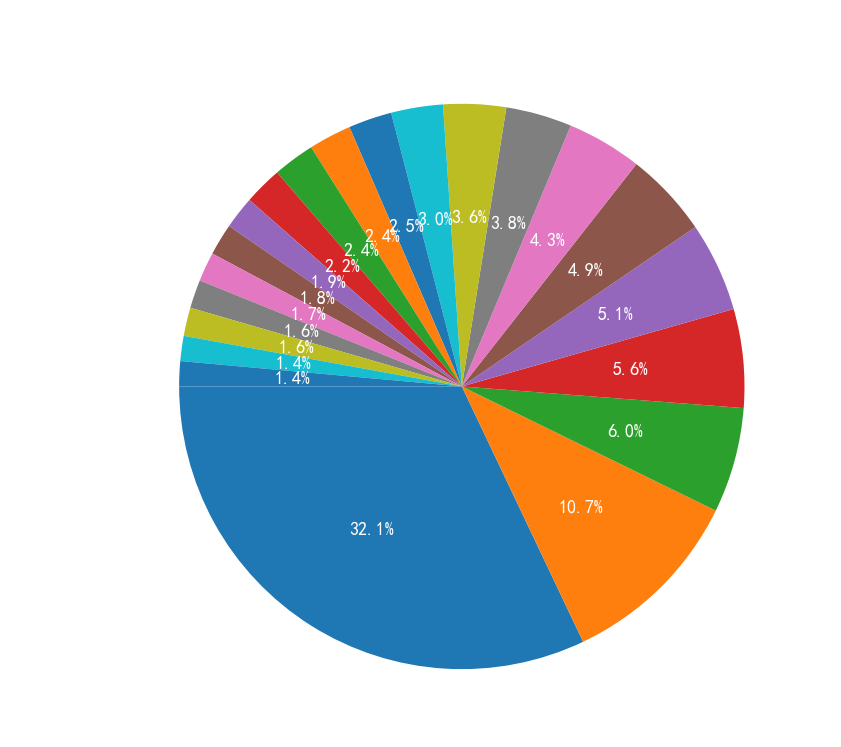

In [8]:
TagsSeries = videosDatabaseDF['videoTag'].value_counts()
TagsLength = len(TagsSeries)
# print(TagsSeries.to_string())
# print(TagsSeries.sort_values)

print("Ê†áÁ≠æÊÄªÊï∞ : ", TagsLength)
TagDict = {}
TagDict['ÂÖ∂‰ªñ'] = 0

for tag_idx in range(TagsLength):
    tagName = TagsSeries.index[tag_idx]
    tagAmount = TagsSeries.iloc[tag_idx]
    if tag_idx < 20:
        TagDict[tagName] = tagAmount
    else:
        TagDict['ÂÖ∂‰ªñ'] += tagAmount

print(TagDict)
print(SeparateBar)


plt.figure(figsize=(13,13))
textProps = {"fontsize":18, "color":"w"}
plt.title("‰∏äÊ¶úËßÜÈ¢ëÊ†áÁ≠æÂàÜÊûêÈ•ºÂõæ", fontdict={"fontsize":25, "color":"w"})
plt.pie(TagDict.values(), labels=TagDict.keys(), autopct="%1.1f%%", textprops=textProps, shadow=False, startangle=180);

### ËßÜÈ¢ëÊ†áÈ¢òÂèäÊé®ËçêÁêÜÁî±È´òÈ¢ëËØçÂàÜÊûê

In [12]:
VideoTitleSeries = videosDatabaseDF.loc[:,'videoName']
VideoRecommendReasonSeries = videosDatabaseDF.loc[:, 'videoRecommendReason']

# Â∞ÜÂêÑ‰∏™Ê†áÈ¢òËøõË°åÁªÑÂêà
joinedTitle = ' '.join(str(title) for title in VideoTitleSeries)
joinedRecommend = ' '.join(str(reason) for reason in VideoRecommendReasonSeries)

titleKeywords = jieba.analyse.extract_tags(joinedTitle, withWeight=True, topK=100)
recommendKeywords = jieba.analyse.extract_tags(joinedRecommend, withWeight=True, topK=100)

# print(titleKeywords)
# print(recommendKeywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\35058\AppData\Local\Temp\jieba.cache
Loading model cost 0.613 seconds.
Prefix dict has been built successfully.


In [13]:
def getWordCloud(imagePath, pltTitle, keywordsListWithFreq, recolor):
    backgroundImage = np.array(Image.open(imagePath))
    imageColors = wordcloud.ImageColorGenerator(backgroundImage)

    keywordsDictWithFreq = {}
    for oneTuple in keywordsListWithFreq:
        keywordsDictWithFreq[oneTuple[0]] = oneTuple[1]

    fontPath = r'c:\Windows\Fonts\simfang.ttf'

    WordCloud = wordcloud.WordCloud(mask=backgroundImage, background_color="white", width=698, height=698, font_path=fontPath)
    WordCloudPic = WordCloud.generate_from_frequencies(keywordsDictWithFreq)

    plt.figure(figsize=(20,40))

    plt.subplot(1,2,1)
    plt.title(pltTitle)
    if recolor is True:
        WordCloudPic = WordCloudPic.recolor(color_func=imageColors)
    plt.imshow(WordCloudPic)

    plt.subplot(1,2,2)
    plt.title("Ê®°ÊùøÂéüÂõæ")
    plt.imshow(backgroundImage)


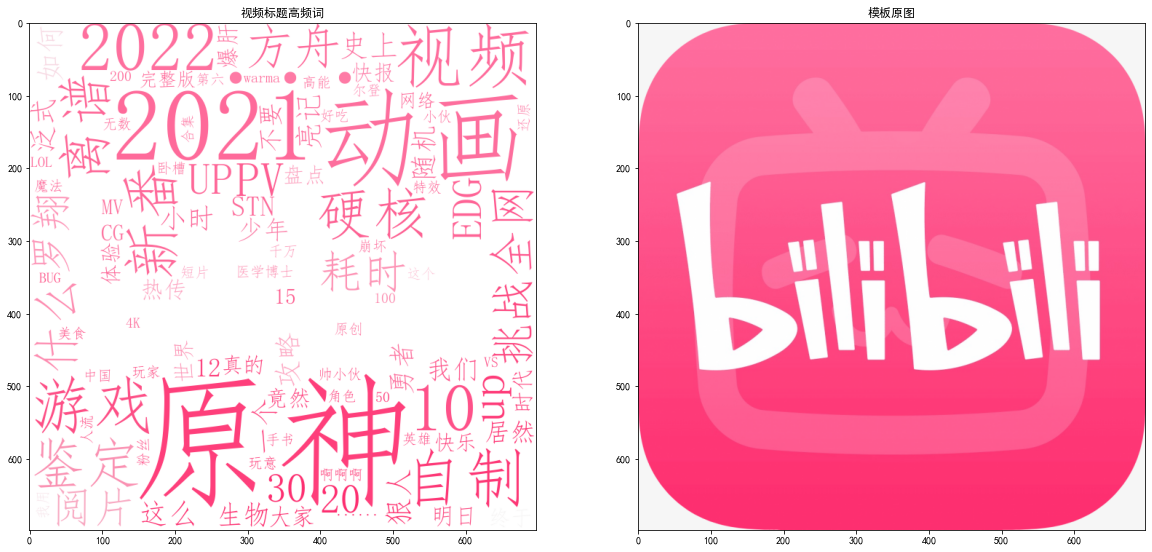

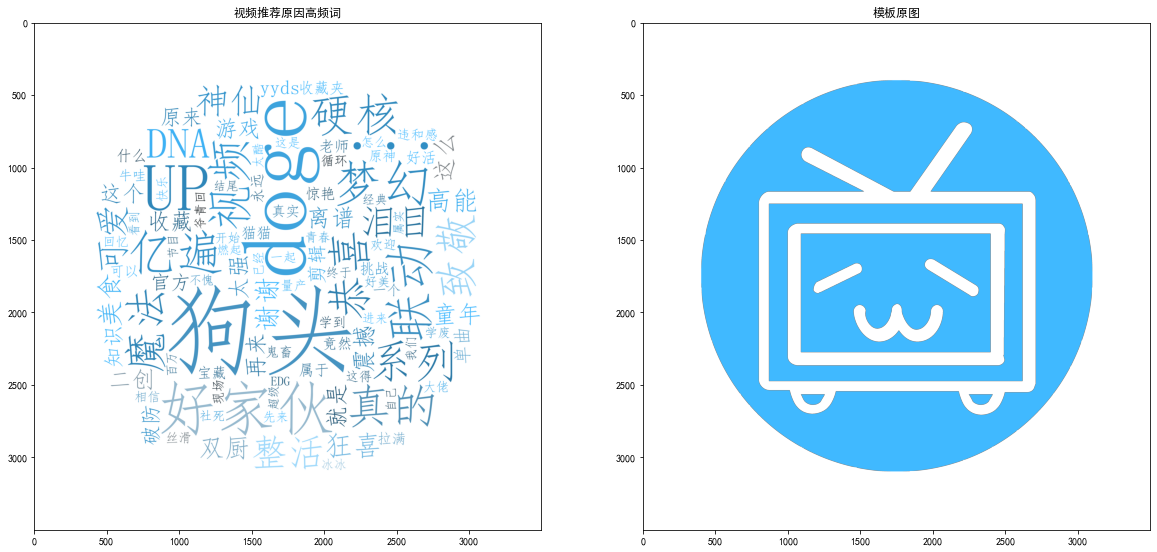

In [14]:
getWordCloud(r'ipynbPics\pink_tv.png', "ËßÜÈ¢ëÊ†áÈ¢òÈ´òÈ¢ëËØç", titleKeywords, True)
getWordCloud(r'ipynbPics\blue_tv.png', "ËßÜÈ¢ëÊé®ËçêÂéüÂõ†È´òÈ¢ëËØç", recommendKeywords, True)

### Â±ïÁ§∫Êï∞ÊçÆÊ≥¢Âä®

In [45]:
careBoardVideosInfoNames = ['videoBoardID', 'videoViews', 'videoDanmaku', 'videoLength', 'videoLikes', 'videoCoins', 'videoFavorites', 'videoComments', 'videoShares']
boardVideosAverageInfo = videosDatabaseDF[careBoardVideosInfoNames].groupby('videoBoardID').max()

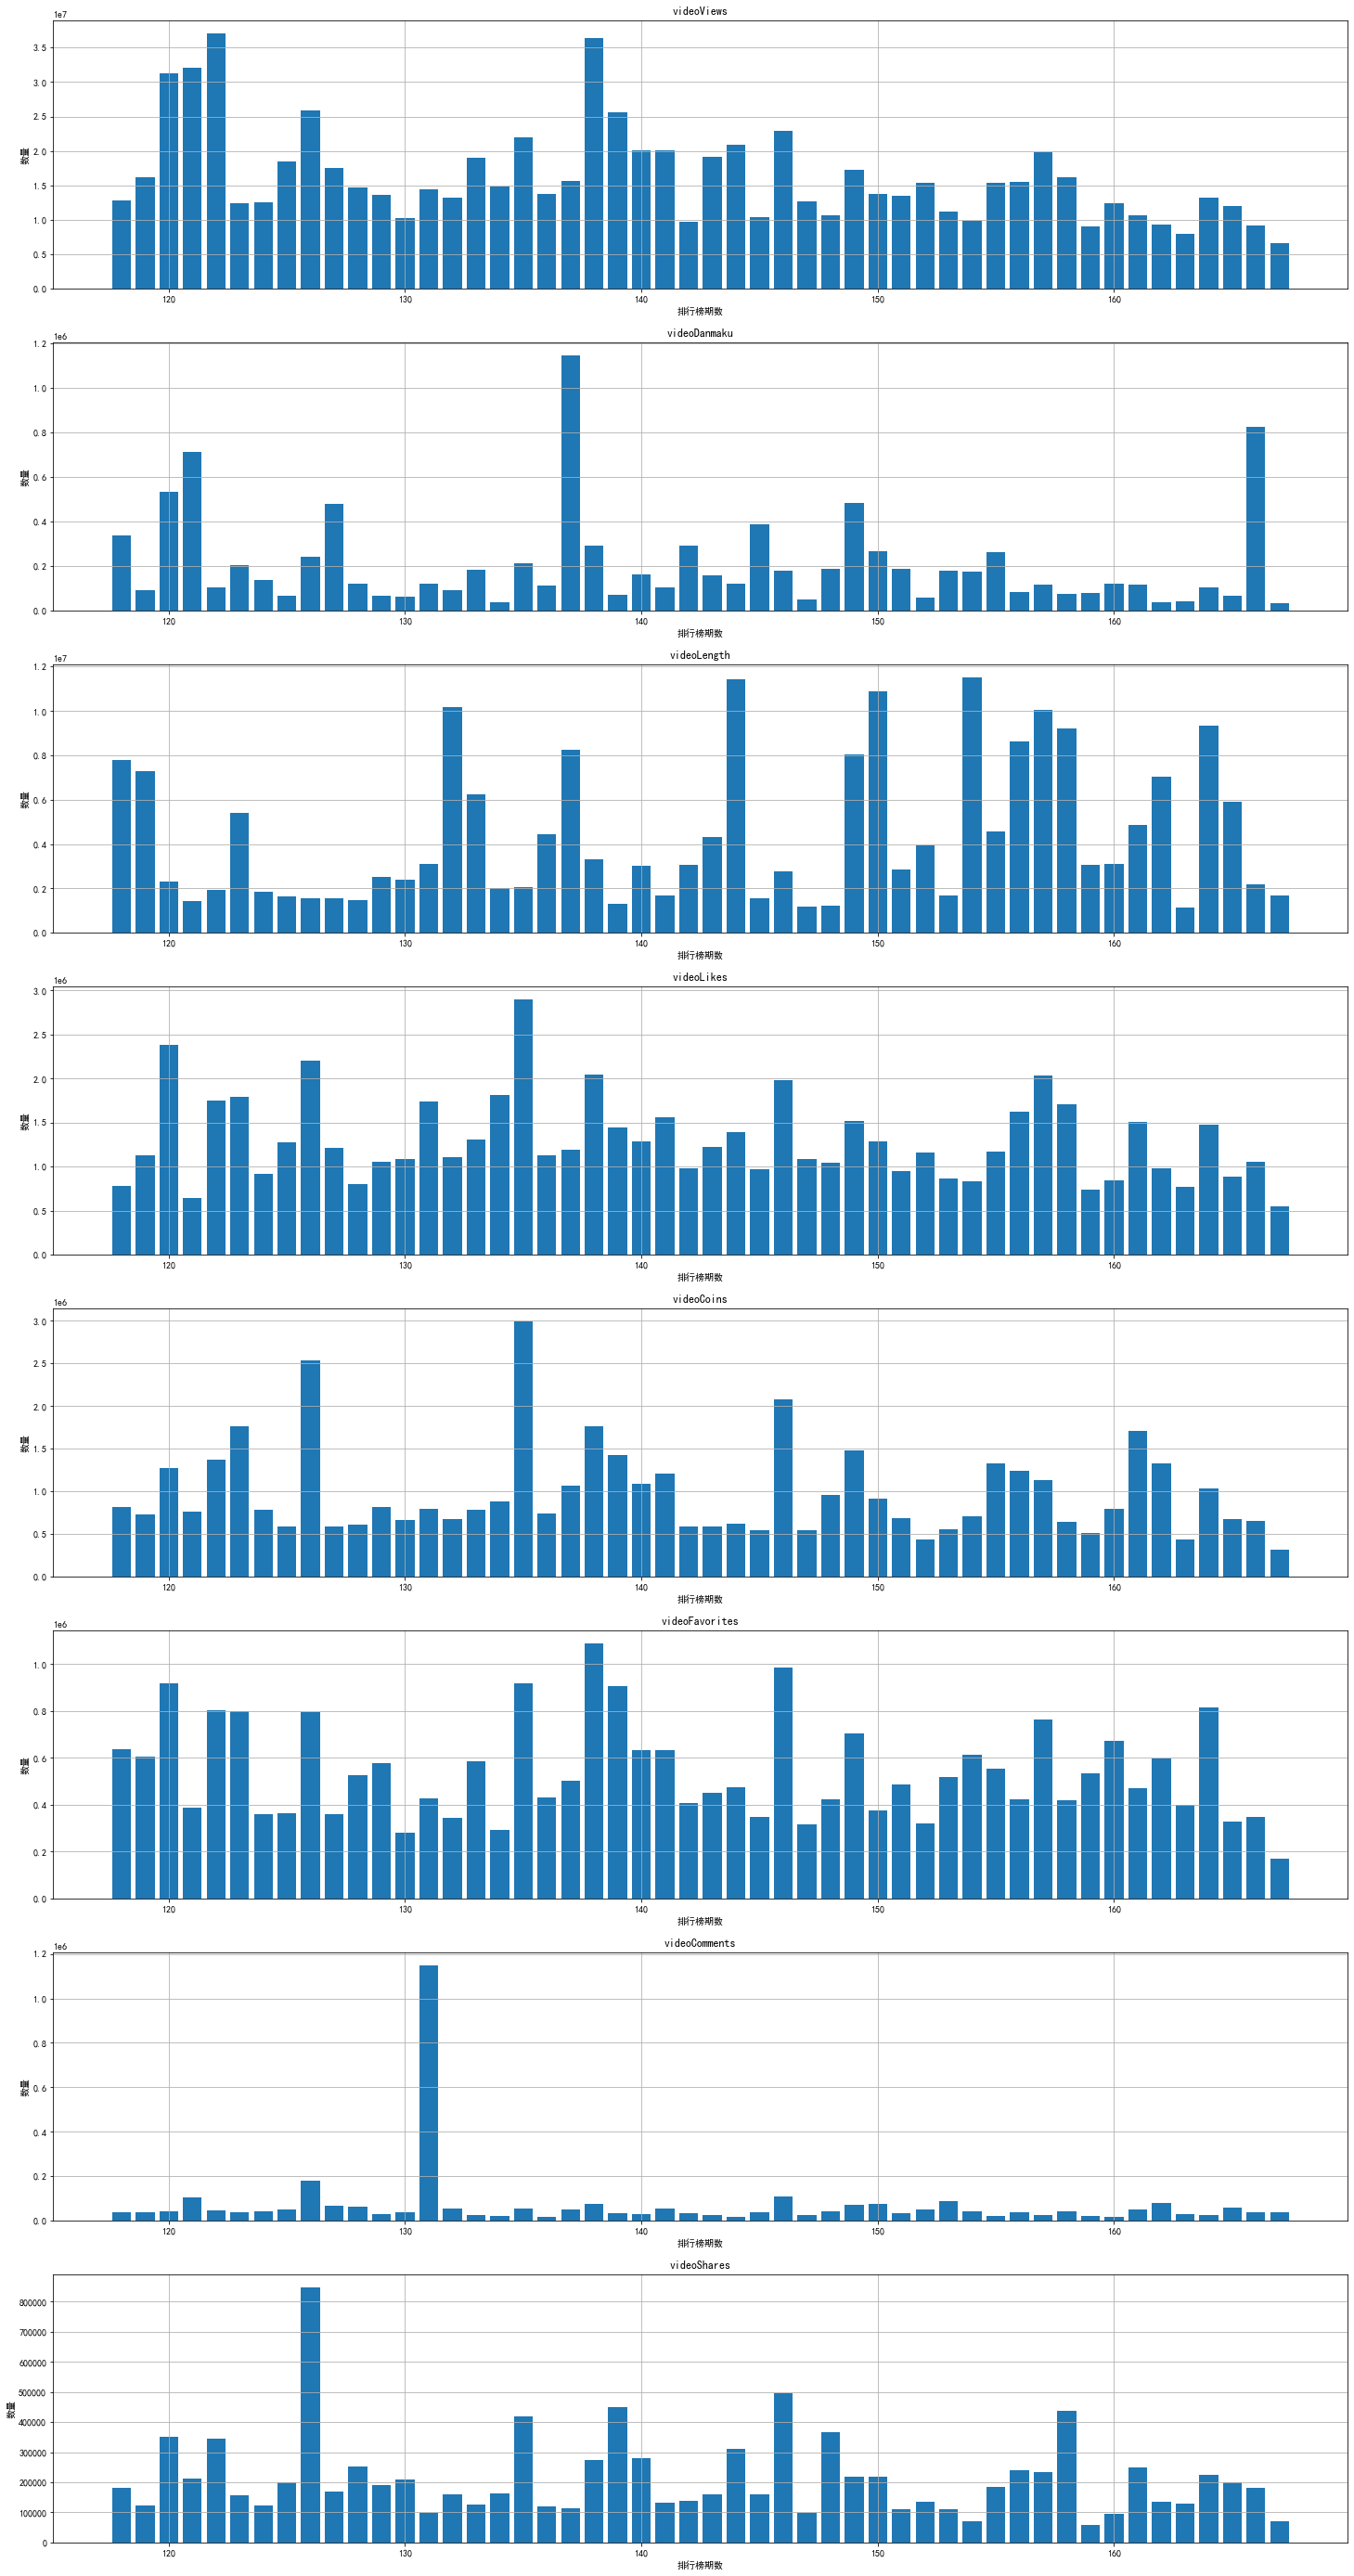

In [46]:
plt.figure(figsize=(25,50))
InfoNumbers = boardVideosAverageInfo.shape[1]
for infoIdx, infoName in enumerate(careBoardVideosInfoNames[1:]):
    tempInfoDict = boardVideosAverageInfo[infoName].to_dict()
    # print(tempInfoDict)
    plt.subplot(InfoNumbers, 1, infoIdx+1)
    plt.title(infoName)
    plt.xlabel("ÊéíË°åÊ¶úÊúüÊï∞")
    plt.ylabel("Êï∞Èáè")
    plt.grid()
    plt.bar(x=tempInfoDict.keys(), height=tempInfoDict.values()) # ËÆæÁΩÆÈ¢úËâ≤ÂèäÈÄèÊòéÂ∫¶





    

### BÁ´ôËßÜÈ¢ëÁõ∏ÂÖ≥ÊÄßÊåáÊ†áÂÖ≥ËÅîÊÄßÂàÜÊûê

<AxesSubplot:>

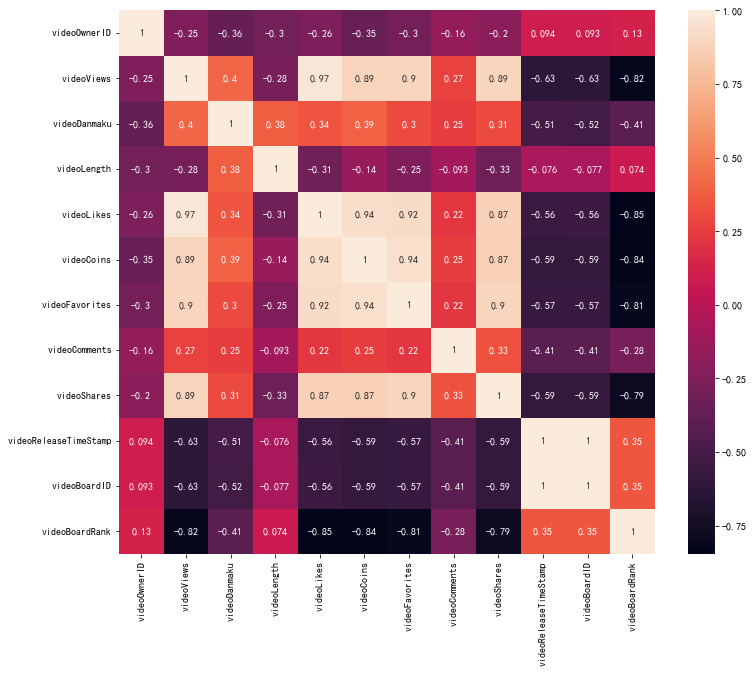

In [44]:
correlationMatrix = videosDatabaseDF.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix.corr(), annot=True)

Áî±Áõ∏ÂÖ≥ÊÄßÁü©ÈòµÂèØ‰ª•ÁúãÂá∫Ôºå‰∏Ä‰∏™ËßÜÈ¢ëÁöÑÁÇπËµûÈáè„ÄÅÊäïÂ∏ÅÈáè„ÄÅÊî∂ËóèÈáè„ÄÅËΩ¨ÂèëÈáè„ÄÅËßÇÁúãÈáèËøôÂá†‰∏™ÊåáÊ†áÂú®BÁ´ôÂπ≥Âè∞ÈÉΩÊòØÂº∫Áõ∏ÂÖ≥ÁöÑ„ÄÇ
ÂêåÊó∂ËßÜÈ¢ëÁöÑÂèóÊ¨¢ËøéÁ®ãÂ∫¶ÂíåËßÜÈ¢ëÁöÑÊó∂ÈïøÂëàË¥üÁõ∏ÂÖ≥ÔºåËøôËØ¥Êòé‰∫∫Ê∞ëÊôÆÈÅçÊõ¥ÂñúÊ¨¢ÁúãÊó∂ÈïøËæÉÁü≠ÁöÑËßÜÈ¢ëÔºå‰πüÊõ¥ÊÑøÊÑèÂéªÁÇπËµûÂíå

### up‰∏ªËØÑÈÄâ

ÊúÄÈ´ò‰∫ßup Top20

In [78]:
hardestUserDF = usersDatabaseDF[['userName', 'userVideos']].groupby('userName').max()
hardestUserDF = hardestUserDF.sort_values(ascending=False, by='userVideos')[0:20]
print(type(hardestUserDF))
hardestUserDF

<class 'pandas.core.frame.DataFrame'>


userVideos
userName               
starÊòüËßÜÈ¢ë           31173
Â§ÆËßÜÁΩë               16300
ËßÇÂØüËÄÖÁΩë              13165
‰∏≠ÂõΩÊó•Êä•               7237
Â§ÆËßÜÊñ∞Èóª               4585
ÂõõÂ∑ùËßÇÂØü               4532
ÂìîÂì©ÂìîÂì©Ëã±ÈõÑËÅîÁõüËµõ‰∫ã         4019
ÂÖ±ÈùíÂõ¢‰∏≠Â§Æ              3810
Â§ÆËßÜÈ¢ë                3609
Â§ÆËßÜÁΩëÂø´Áúã              3599
Ëã±ÈõÑËÅîÁõü               3435
‰∫∫Ê∞ëÁΩë                3098
Êñ∞ÂçéÁ§æ                2984
Â§ßÂè∏È©¨Â∑•‰ΩúÂÆ§             2441
‰ªªÊÄßÁöÑKIMKILLS        2386
Âπø‰∏úÂÖ±ÈùíÂõ¢              2271
ËßÇËßÜÈ¢ëÂ∑•‰ΩúÂÆ§             2270
‰∏≠ÂõΩÈïøÂÆâÁΩë              2243
ÁéãËÄÖËç£ËÄÄ               2075
ÂêüÊ∏∏Â§ßÂè∏‰∫∫              1839

Á≤â‰∏ùÊï∞ÊúÄÂ§öup‰∏ª Top20

In [79]:
popularUserDF = usersDatabaseDF[['userName', 'userFans']].groupby('userName').max()
popularUserDF = popularUserDF.sort_values(ascending=False, by='userFans')[0:20]
print(type(popularUserDF))
popularUserDF

<class 'pandas.core.frame.DataFrame'>


userFans
userName            
ÁΩóÁøîËØ¥ÂàëÊ≥ï       22736797
ËÄÅÁï™ËåÑ         17268968
ÂìîÂì©ÂìîÂì©Ëã±ÈõÑËÅîÁõüËµõ‰∫ã  11566510
ÂéüÁ•û          11554915
ÂÖ±ÈùíÂõ¢‰∏≠Â§Æ        9581901
ÁªµÁæäÊñôÁêÜ         9553728
ËÄÅÂ∏àÂ•ΩÊàëÂè´‰ΩïÂêåÂ≠¶     9496558
Â§ÆËßÜÊñ∞Èóª         9326856
Êï¨Ê±âÂçø          9282411
Êú®È±ºÊ∞¥ÂøÉ         8818431
‰∏≠ÂõΩBOYË∂ÖÁ∫ßÂ§ßÁå©Áå©   8199975
ÂáâÈ£éKaze       8195211
Â∞èÊΩÆÈô¢Èïø         7654114
Êó†Á©∑Â∞è‰∫ÆÁöÑÁßëÊôÆÊó•Â∏∏    7572052
ÊïñÂéÇÈïø          7562612
ËßÇÂØüËÄÖÁΩë         7511299
ÂæêÂ§ßËôæÂíØ         7422845
ÊüêÂπªÂêõ          7320763
ËÆ∞ÂΩïÁîüÊ¥ªÁöÑËõãÈªÑÊ¥æ     7184457
papiÈÖ±        7112534

### ËßÜÈ¢ëËØÑÈÄâ

ËßÇÁúãÊ¨°Êï∞ÊúÄÂ§ö Top20

In [83]:
mostViewsDF = videosDatabaseDF[['videoName', 'videoBoardID','videoViews']].sort_values(by='videoViews', ascending=False)[0:20]
mostViewsDF

videoName  videoBoardID  videoViews
1906                        ‚ö°Ëê® Êó• ÊúóÔºÅÔºÅÔºÅ‚ö°           122    37104185
1299       „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138    36340242
1946  „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„Äå‰∫îÊúàÁ≤â‰∏ùËßÅÈù¢‰ºöÂÆûÂÜµ„Äç-„Ää‰∏ñÁïå‰∏äÁöÑÂè¶‰∏Ä‰∏™Êàë„ÄãÁ∫Ø‰∫´Áâà           121    32033332
1976           Á†¥‰∫øÁ∫™Âøµ!„ÄêÁåõÁî∑Áâà„ÄëÊñ∞ÂÆùÂ≤õ 4KÈ´òÊ∏ÖÈáçÁΩÆÂä†Âº∫Áâà           120    31296464
1748              ‰∫∫Á±ªÈ´òË¥®ÈáèÁé©ÂÖ∑ÔºÅÊàëËöåÂü†‰Ωè‰∫ÜÔºåÂìàÂìàÂìàÂìàÂìàÂìà           126    25900519
1248              ÂâçÊñπÈ´òËÉΩÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÂ•≥Â£∞Áâà Ë∂ÖAÁáÉÁÇ∏ÔºÅÔºÅ           139    25620104
1747             „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126    25033560
1751           ‰∏çÊòØÂêß‰∏çÊòØÂêßÔºåÂà´‰∫∫ÂèëÈÉΩÁÅ´‰∫ÜÔºåÊàëËá™Â∑±ÂèëËøòËÉΩÁÅ´ÂêóÔºü           126    23941129
950                    „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146    22974335
1401                „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135    22004589
1274      „ÄêS11ÂÖ®ÁêÉÊÄªÂÜ≥Ëµõ„ÄëÂÜ≥Ëµõ 11Êúà6Êó• EDG vs DK           138    21528129
1024                ‚ÄúÊÄªÊúâ‰∏ÄÂ§©ÔºåÂÖ®ÂüéÁöÑÁãóÔºåÈÉΩË¶ÅÈ´òÁúãÊàëÔºÅ‚Äù           144    20890745
1217             „ÄäÂ≠§ÂãáËÄÖ„ÄãÂâçÊñπÊ†∏ËÉΩÔºÅË∞ÅËØ¥Â•≥Áîü‰∏çÈÄÇÂêàÂî±ËøôÊ≠åÔºü           140    20136334
1154             „ÄäÂ≠§ÂãáËÄÖ„ÄãÂâçÊñπÊ†∏ËÉΩÔºÅË∞ÅËØ¥Â•≥Áîü‰∏çÈÄÇÂêàÂî±ËøôÊ≠åÔºü           141    20136296
420                ‚ö°Ô∏è ‰∏≠ ÂõΩ ‰∫∫ ‰∏ç Ëπ¶ Ê¥ã Ëø™ ‚ö°Ô∏è           157    19866771
1068                     Êó† ‰º§ ÈÄü ÈÄö ÂÇ¨ ÈÄù Âëò           143    19080432
1480             ÂëúÂëúÔºåËøô‰πüÂ§™ÂèØÁà±‰∫ÜÂêßÔºÅËÉ°Ê°ÉÊëáÁé©ÂÖ∑Áªà‰∫éÊù•‰∫ÜÔºÅ           133    18958873
1904                           ‰π∞ Áìú Â§ß Èòü           122    18888689
1790                     Êó† ‰º§ Âèç ÊùÄ Âàò Âçé Âº∫           125    18444704
1715               17‰∏™ÁÆÄÂçïÊúâË∂£ÁöÑÂ∞èÈ£üË∞± ÊúâÊâãÂ∞±ËÉΩÂÅöÁ≥ªÂàó           127    17511309

ÂºπÂπïÊï∞ÈáèÊúÄÂ§ö Top20

In [85]:
mostDanmakuDF = videosDatabaseDF[['videoName', 'videoBoardID','videoDanmaku']].sort_values(by='videoDanmaku', ascending=False)[0:20]
mostDanmakuDF

videoName  videoBoardID  videoDanmaku
1340                      „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄäÂÖâÁéØ‰∏≠ÁöÑÂ∞ëÂπ¥‚Äî‚Äî‚ÄúË∏ØË∫Ö‚Äù„Äã           137       1147328
52                                  „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄäÂæ™Ê¢¶„Äã           166        824367
1946           „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„Äå‰∫îÊúàÁ≤â‰∏ùËßÅÈù¢‰ºöÂÆûÂÜµ„Äç-„Ää‰∏ñÁïå‰∏äÁöÑÂè¶‰∏Ä‰∏™Êàë„ÄãÁ∫Ø‰∫´Áâà           121        710589
1991                  „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄåÁÅ´ÂäõÂÖ®ÂºÄ„Äç‰∫îÊúàÁ≤â‰∏ùËßÅÈù¢‰ºöÁªÉ‰π†ÂÆ§ËÅîÊéí           120        531826
835                                           Ôºü           149        482530
1711                  Á¨¨‰∏ÄÊ¨°ÊâìÂÆåÁêÉÊúâÂ•≥ÁîüÂä†ÊàëÂæÆ‰ø°ÔºåÁªìÊûúÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïä           127        478942
997                        Âú®2022Âπ¥‰πãÂâçÁúãÂÆåËøô‰∏™ËßÜÈ¢ëÔºÅ(ÁúãÁÆÄ‰ªã)           145        389152
2087  „ÄêHenryÂàòÂÆ™Âçé„ÄëWith Ailee„ÄäRolling in the Deep„Äã           118        339598
802                                   2022ÂéüÁ•ûÊñ∞Êò•‰ºö           149        331535
1128                  „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄäËøôÁ¶èÊ∞îÁªô‰Ω†Ë¶Å‰∏çË¶Å„Äã‰πãÁ¶èÊ∞îÂ§ßÁßÄÁ≠πÂ§á‰∏≠           142        293460
1274               „ÄêS11ÂÖ®ÁêÉÊÄªÂÜ≥Ëµõ„ÄëÂÜ≥Ëµõ 11Êúà6Êó• EDG vs DK           138        292724
2082                          „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„ÄëÊó•Â∏∏ËÆ≠ÁªÉVLOGÂêàÈõÜ           118        276213
760                                 2022ÊàëÁöÑ‰∏ñÁïåÊãúÂπ¥Á∫™           150        268490
546                       ËøôÊòØÊàëÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞ËóèÁãêÔºå‰πüÊòØËóèÁãêÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞Êàë           155        261302
1747                      „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126        243655
1749               „ÄêÊâçÊµÖÊâãÂ∑•„ÄëËä±Ë¥π4‰∏™Êúà25‰∏áÂÖÉÊé¢ÂØª‰∏âÊòüÂ†ÜÈáëÊùñÂà∂‰ΩúÂ∑•Ëâ∫‰πãË∞ú           126        229411
1416                    „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄäËøôÁ¶èÊ∞îÁªô‰Ω†Ë¶Å‰∏çË¶Å„Äã‰πãÊùéÊÄªÁöÑÊä•ÊÅ©           135        214689
1884                „Äê1080P 60Â∏ß ÂÖ®ÂõûÈ°æ„Äë2008Âåó‰∫¨Â••Ëøê‰ºöÂºÄÂπïÂºè           123        205251
754                                 2022ÂìîÂì©ÂìîÂì©ÊãúÂπ¥Á∫™           150        203807
1273              Âè≤‰∏äÊúÄÁ¶ªË∞±ÈöèÊú∫ÊåëÊàòÔºÅÊàë‰ª¨Áªà‰∫éÂéªËÄÅÁï™ËåÑÂÆ∂Ëπ≠È•≠‰∫ÜÔºÅÔºÅ„ÄêÁ¨¨‰∏ÉÊúü„Äë           138        196328

ËßÜÈ¢ëÈïøÂ∫¶ÊúÄÈïø Top20

In [86]:
longestVideoDF = videosDatabaseDF[['videoName', 'videoBoardID','videoLength']].sort_values(by='videoLength', ascending=False)[0:20]
longestVideoDF

videoName  videoBoardID  \
575                           ‰∏ÄÂè£Ê∞îÁúãÂÆå„ÄäÂØÇÈùôÂ≤≠„ÄãÁ≥ªÂàóÂâßÊÉÖÔºÅÊïëËµé‰πãÈÅìÔºåÂ∞±Âú®ÂÖ∂‰∏≠ÔºÅ           154   
1027              Ë∂ÖÂá°ËúòËõõ‰æ†3Â∫îËØ•ÊòØËøôÊ†∑ÊãçÁöÑÔºÅ(Ê∏∏ÊàèÁîµÂΩ±)„ÄäÊº´Â®Å/Ë∂ÖÂá°ËúòËõõ‰æ†3-ÊàòÂØºÂâ™ËæëÁâà„Äã           144   
754                                         2022ÂìîÂì©ÂìîÂì©ÊãúÂπ¥Á∫™           150   
1550       Â∞ÜDNFÂâ™Êàê‰∏ÄÈÉ®ÁîµÂΩ±‰ºöÂèëÁîü‰ªÄ‰πàÔºüÊó∂Èïø2Â∞èÊó∂50ÂàÜÂ≠òÊ¥ªÁ°ÆËÆ§ÔºÅ‰Ω†ËÉΩÂùöÊåÅÁúãÂÆåÂêóÔºü‰∏ÄÂè£Ê∞îÁúã‰∏™ÁàΩÔºÅ           132   
455                             „ÄêÁéãËÄÅËèä„ÄëÁéØÁéãÁ´ãÂêé‰º† | ËâæÂ∞îÁôªÊ≥ïÁéØEP.12           157   
155   BÁ´ôÁã¨ÂÆ∂„ÄäÂà∫ÂÆ¢‰ø°Êù° : Â§ßÈù©ÂëΩ„ÄãÁîµÂΩ±Áâà Âê´ÂÖ®Êñ∞ÈïúÂ§¥ ‰∏≠Ê≥ïËã±‰∏âÂ≠ó 155ÂàÜÈíüÂÆåÊï¥Áâà ÊøÄËç°ÁöÑÈù©ÂëΩ...           164   
383                                     ÁÅ´ÂΩ±‰∏≠ÈÇ£‰∫õÊó†Ê≥ïË∂ÖË∂äÁöÑÁîªÈù¢‰∏éÂè∞ËØç           158   
493                    „ÄêÁéãËÄÅËèä„Äë‰Ω†Ë¢´ÊíµÁùÄË∑ëÁöÑÊ†∑Â≠êÂÉèÊûÅ‰∫Ü‰∏ÄÊù°Áãó | ËâæÂ∞îÁôªÊ≥ïÁéØEP.08           156   
1340                              „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„ÄäÂÖâÁéØ‰∏≠ÁöÑÂ∞ëÂπ¥‚Äî‚Äî‚ÄúË∏ØË∫Ö‚Äù„Äã           137   
814                                 2022ÊòéÊó•ÊñπËàüÊñ∞Êò•‰ºö„ÄåÊµÅÂÖâÂêØÊòé„Äç-‰∏ä           149   
802                                           2022ÂéüÁ•ûÊñ∞Êò•‰ºö           149   
775                                        „Äê2022¬∑‰∏úÊñπÂçéÁÅØÂÆ¥„Äë           150   
2070                   2021Áõ∏ËÅöBÁ´ôÔºå‰∏ÄËµ∑ÊØï‰∏öÔºÅ„ÄêBÁ´ôÂ§èÊó•ÊØï‰∏öÊ≠å‰ºö2021ÂÖ®Á®ãÂõûÈ°æ„Äë           118   
2022                     „Äê1080P 2Â∞èÊó∂ÂÆåÊï¥Áâà„ÄëÂ∫ÜÁ•ù‰∏≠ÂõΩÂÖ±‰∫ßÂÖöÊàêÁ´ã100Âë®Âπ¥Â§ß‰ºö           119   
212                                 2022ÊòéÊó•ÊñπËàü‰∏âÂë®Âπ¥„ÄåÁîüÊó•Âàõ‰ΩúÊ¥æÂØπ„Äç           162   
783                                           2022ÂéüÁ•ûÊãúÂπ¥Á∫™           150   
576         Kizuna AI The Last Live ‚Äúhello, world 2022‚Äù           154   
1487                          „ÄäÂéüÁ•û„ÄãÁ∫ø‰∏äÈü≥‰πê‰ºö2021‚Äî‚Äî‚Äî„ÄåÊó†ÈôÖ‰πãÊóÖÁöÑÊóãÂæã„Äç           133   
230                            Ëøô‰∏™ËßÜÈ¢ëËÆ©‰Ω†ÊòéÁôΩÔºå‰ªªÂ§©Â†ÇÂà∞Â∫ïÊúâÂ§öÁâõÔºü„ÄêÁîüÊÑè02„Äë           162   
99    Á≤æÂΩ©ÔºÅÔºÅÂÖ®ÁêÉÈÄöÂÖ≥Áéá1.4%ÔºåÂú®ËôöÊó†‰∏ñÁïåÂØªÊâæ*Â≠òÂú®*ÁöÑÊÑè‰πâÔºå‰Ω†‰ªéÊú™ËßÅËøáÁöÑ‰øÑÁΩóÊñØË∂ÖÁé∞ÂÆû‰∏ª‰πâÊ∏∏Êàè-...           165   

      videoLength  
575      11532431  
1027     11421369  
754      10905665  
1550     10193467  
455      10049167  
155       9348333  
383       9201549  
493       8630457  
1340      8244451  
814       8032207  
802       7840185  
775       7832516  
2070      7772685  
2022      7273848  
212       7051044  
783       6481657  
576       6420185  
1487      6237988  
230       6096781  
99        5920036

ÁÇπËµûÊ¨°Êï∞ÊúÄÂ§ö Top20

In [89]:
mostLikesDF = videosDatabaseDF[['videoName', 'videoBoardID','videoLikes']].sort_values(by='videoLikes', ascending=False)[0:20]
mostLikesDF

videoName  videoBoardID  videoLikes
1401                          „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135     2902459
1976                     Á†¥‰∫øÁ∫™Âøµ!„ÄêÁåõÁî∑Áâà„ÄëÊñ∞ÂÆùÂ≤õ 4KÈ´òÊ∏ÖÈáçÁΩÆÂä†Âº∫Áâà           120     2380736
1747                       „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126     2198890
1273               Âè≤‰∏äÊúÄÁ¶ªË∞±ÈöèÊú∫ÊåëÊàòÔºÅÊàë‰ª¨Áªà‰∫éÂéªËÄÅÁï™ËåÑÂÆ∂Ëπ≠È•≠‰∫ÜÔºÅÔºÅ„ÄêÁ¨¨‰∏ÉÊúü„Äë           138     2044465
420                          ‚ö°Ô∏è ‰∏≠ ÂõΩ ‰∫∫ ‰∏ç Ëπ¶ Ê¥ã Ëø™ ‚ö°Ô∏è           157     2039258
932                        ÁâπÊïàÁÇ∏Ë£ÇÔºÅÂπ¥Â∫¶‰πãÊàòÔºÅÁâπÊïàÂ∞èÂì•Â§ßÊàòÂª∫Ê®°Â∞èÂì•4           146     1984643
1299                 „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138     1837001
1439                      ËØ¥Âá∫Êù•‰Ω†‰ª¨ÂèØËÉΩ‰∏ç‰ø°ÔºåÊàëÂ∑ÆÁÇπË¢´Ëøô‰∏™Â∞èÂßëÂ®òÈöæ‰Ωè‰∫Ü           134     1807566
1870                                  „Äê‰ΩïÂêåÂ≠¶„ÄëÊ∞∏ËøúÊòØÂêåÂ≠¶           123     1791443
1906                                  ‚ö°Ëê® Êó• ÊúóÔºÅÔºÅÔºÅ‚ö°           122     1754655
1557                 Âè≤‰∏äÊúÄÁ¶ªË∞±ÈöèÊú∫ÊåëÊàòÔºÅÂ±ÖÁÑ∂Ë¢´Âë®Ê∑ëÊÄ°ÂèçÂêëËπ≠È•≠‰∫Ü‚Ä¶„ÄêÁ¨¨ÂõõÊúü„Äë           131     1738642
1903                               ÁñØÁãÇÂä®Áâ©Âüé2ÔºöÁÉ≠Èó®ÁîüÁâ©Èâ¥ÂÆö           122     1718031
373                                   ÊàëÊù•BÁ´ô‚ÄúÂçñÁìú‚Äù‰∫ÜÔºÅ           158     1706991
950                              „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146     1658992
1402                     Â§™Â§∏Âº†‰∫ÜÔºÅÔºÅÈöèÊú∫ÊåëÊàòÂ±ÖÁÑ∂ÊääÁéãÂòâÂ∞îËØ∑Âà∞‰∫ÜÊàëÂÆ∂ÔºÅÔºÅ           135     1637286
463                  „ÄêËÖæÊ†ºÂ∞î„ÄëÊ≥®ÂÖ•ÁÅµÈ≠ÇÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÊù•‰∫ÜÔºåÈÄÅÁªôÊàëÁöÑÂ∞èÁ≤â‰∏ù‰ª¨ÔºÅ           156     1618068
1749                „ÄêÊâçÊµÖÊâãÂ∑•„ÄëËä±Ë¥π4‰∏™Êúà25‰∏áÂÖÉÊé¢ÂØª‰∏âÊòüÂ†ÜÈáëÊùñÂà∂‰ΩúÂ∑•Ëâ∫‰πãË∞ú           126     1569708
1152                   Á¶ªÂ§ßË∞±ÔºÅÈöèÊú∫Â∏ÆÂà´‰∫∫ÂÆûÁé∞Ê¢¶ÊÉ≥ÔºåÁ´üÁÑ∂Ë∑ëÊñ≠‰∫ÜËÖø(Áâ©ÁêÜ)ÔºÅ           141     1557639
1403                               Âç´ÁîüÊâ£ÂàÜÂÜôÊ£ÄËÆ®ÁöÑÂ∑ÖÂ≥∞‰πã‰Ωú„ÄÇ           135     1557193
425   Ë∞Å‰ºöÊãíÁªù‰∏ÄÈ¶ñÂÖçË¥πÁöÑÁ®ªÈ¶ôÂë¢ÔΩûÂ¶ÇÊûú‰Ω†ÊääÂú®ÂüéÂ∏ÇÁöÑÂä™ÂäõÁ®ãÂ∫¶ÊîæÂà∞ÂÜúÊùëÔºå‰Ω†ÁöÑÁîüÊ¥ª‰πüÂèØ‰ª•ËøáÁöÑÂæàÂ•Ω„ÄÇ           157     1523197

ÊäïÂ∏ÅÊï∞ÈáèÊúÄÂ§ö Top20

In [90]:
mostCoinsDF = videosDatabaseDF[['videoName', 'videoBoardID','videoCoins']].sort_values(by='videoCoins', ascending=False)[0:20]
mostCoinsDF

videoName  videoBoardID  videoCoins
1401                        „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135     2997729
1747                     „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126     2532222
1749              „ÄêÊâçÊµÖÊâãÂ∑•„ÄëËä±Ë¥π4‰∏™Êúà25‰∏áÂÖÉÊé¢ÂØª‰∏âÊòüÂ†ÜÈáëÊùñÂà∂‰ΩúÂ∑•Ëâ∫‰πãË∞ú           126     2204687
932                      ÁâπÊïàÁÇ∏Ë£ÇÔºÅÂπ¥Â∫¶‰πãÊàòÔºÅÁâπÊïàÂ∞èÂì•Â§ßÊàòÂª∫Ê®°Â∞èÂì•4           146     2076467
950                            „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146     2036361
1870                                „Äê‰ΩïÂêåÂ≠¶„ÄëÊ∞∏ËøúÊòØÂêåÂ≠¶           123     1764598
1299               „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138     1760215
238                   „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÊâæÂà∞‰∫ÜÊàëÊúÄÂñúÊ¨¢ÁöÑÊï∞Á†Å‰∫ßÂìÅÔºå‰ΩÜÊòØ...           161     1713871
802                                  2022ÂéüÁ•ûÊñ∞Êò•‰ºö           149     1479942
1248                      ÂâçÊñπÈ´òËÉΩÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÂ•≥Â£∞Áâà Ë∂ÖAÁáÉÁÇ∏ÔºÅÔºÅ           139     1430990
1903                             ÁñØÁãÇÂä®Áâ©Âüé2ÔºöÁÉ≠Èó®ÁîüÁâ©Èâ¥ÂÆö           122     1369379
511   „ÄêCGÁü≠Áâá„Äë‰∏™‰∫∫ÁßëÂπªÁü≠Áâá„ÄäDEEPÔºöÊ∑±Êµ∑„Äã ‚Äî‚ÄîËÄóÊó∂‰∏§Âπ¥ÂçäÁã¨Á´ãÂÆåÊàêÁöÑ‰∏™‰∫∫CG‰ΩúÂìÅ           155     1329147
202                        ËøõÊù•ËÆ©‰∏ñÁïåÊÑüÂèó‰∏Ä‰∏ã‰ªÄ‰πàÊòØÂÜÖÂç∑Áéã‰∏≠ÁéãÔºÅÔºÅ           162     1324333
1750                    „ÄêÂπøÂú∫ÂæÄ‰∫ã„Äë„ÄäÂ¶á‰ªáËÄÖËÅîÁõü„ÄãÔºöÊû™Âú®ÊâãÔºåË∑üÈπÖËµ∞ÔºÅ           126     1275590
1976                   Á†¥‰∫øÁ∫™Âøµ!„ÄêÁåõÁî∑Áâà„ÄëÊñ∞ÂÆùÂ≤õ 4KÈ´òÊ∏ÖÈáçÁΩÆÂä†Âº∫Áâà           120     1272690
463                „ÄêËÖæÊ†ºÂ∞î„ÄëÊ≥®ÂÖ•ÁÅµÈ≠ÇÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÊù•‰∫ÜÔºåÈÄÅÁªôÊàëÁöÑÂ∞èÁ≤â‰∏ù‰ª¨ÔºÅ           156     1242035
804                                    Áå´ Âíå ËÄÅ Èº†           149     1231334
1152                 Á¶ªÂ§ßË∞±ÔºÅÈöèÊú∫Â∏ÆÂà´‰∫∫ÂÆûÁé∞Ê¢¶ÊÉ≥ÔºåÁ´üÁÑ∂Ë∑ëÊñ≠‰∫ÜËÖø(Áâ©ÁêÜ)ÔºÅ           141     1209987
1273             Âè≤‰∏äÊúÄÁ¶ªË∞±ÈöèÊú∫ÊåëÊàòÔºÅÊàë‰ª¨Áªà‰∫éÂéªËÄÅÁï™ËåÑÂÆ∂Ëπ≠È•≠‰∫ÜÔºÅÔºÅ„ÄêÁ¨¨‰∏ÉÊúü„Äë           138     1199288
1871                               Ôºà Êó† Âêç Ëã± ÈõÑ Ôºâ           123     1136592

Êî∂ËóèÊ¨°Êï∞ÊúÄÂ§ö Top20

In [91]:
mostFavoritesDF = videosDatabaseDF[['videoName', 'videoBoardID','videoFavorites']].sort_values(by='videoFavorites', ascending=False)[0:20]
mostFavoritesDF

videoName  videoBoardID  \
1299                        „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138   
950                                     „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146   
1993                             „ÄêÊØèÂ§©‰∏ÄÈÅç„Äë10ÂàÜÈíüËÇöËÖ©Ê∂àÂáèËÆ≠ÁªÉ(Áî∑Â•≥ÈÄöÁî®)           120   
1401                                 „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135   
1248                               ÂâçÊñπÈ´òËÉΩÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÂ•≥Â£∞Áâà Ë∂ÖAÁáÉÁÇ∏ÔºÅÔºÅ           139   
130          ‚ÄúÂéÜÂè≤‰π¶Â§™Â∞è Ë£Ö‰∏ç‰∏ã‰∏Ä‰∏™‰∫∫Ê≥¢ÊæúÂ£ÆÈòîÁöÑ‰∏ÄÁîü   ÂéÜÂè≤‰π¶ÂèàÂ§™Â§ß Ë£Ö‰∏ã‰∫ÜÂçéÂ§è‰∏ä‰∏ã‰∫îÂçÉÂπ¥ ‚Äù           164   
1906                                         ‚ö°Ëê® Êó• ÊúóÔºÅÔºÅÔºÅ‚ö°           122   
1885  Ëøô‰∫õÂ≠¶ÁîüÂÖöÊúÄÂ∫îËØ•Áü•ÈÅìÁöÑ‰∫ãÔºÅÂèØÊÉú‰πãÂâçÊ≤°‰∫∫ÂëäËØâÊàë‚Ä¶ÊäÄËÉΩ/ËΩØ‰ª∂/ÁºñÁ®ã/Ëã±ËØ≠/‰∫åÂ§ñ/ËÆ°ÁÆóÊú∫‰∫åÁ∫ß/ÂÖ∂‰ªñ...           123   
1747                              „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126   
1976                            Á†¥‰∫øÁ∫™Âøµ!„ÄêÁåõÁî∑Áâà„ÄëÊñ∞ÂÆùÂ≤õ 4KÈ´òÊ∏ÖÈáçÁΩÆÂä†Âº∫Áâà           120   
420                                 ‚ö°Ô∏è ‰∏≠ ÂõΩ ‰∫∫ ‰∏ç Ëπ¶ Ê¥ã Ëø™ ‚ö°Ô∏è           157   
1903                                      ÁñØÁãÇÂä®Áâ©Âüé2ÔºöÁÉ≠Èó®ÁîüÁâ©Èâ¥ÂÆö           122   
810                   ÊàëÊÉä‰∫ÜÔºÅEdgeÊµèËßàÂô®Á´üÁÑ∂ËøòËÉΩËøôÊ†∑Áî®ÔºüÔºÅÂæàÂ§ö‰∫∫ÈÉΩ‰∏çÁü•ÈÅì......           149   
1233                                 Âõ†‰∏∫ÂóìÂ≠êÂí≥Âìë‰∫ÜÊâÄ‰ª•ÊàëÊñóËÉÜÂ∞ùËØï‰∫Ü‰∏Ä‰∏ã‚Ä¶           139   
282         Ëøô‰∫õup‰∏ªÊòØ‰∏≠Â≠¶ÁîüÂíåÂ§ßÂ≠¶ÁîüÁöÑÊïëÊòüÂïäÂïäÂïäÂïäÂïäÔºÅÔºÅÔºÅÂ≠¶‰π†ÊñπÊ≥ïÔΩúÂÖçË¥πËØæÁ®ãÔΩúÂÖ¥Ë∂£ÊäÄËÉΩÔΩúÁîüÊ∂ØËßÑÂàí           160   
802                                           2022ÂéüÁ•ûÊñ∞Êò•‰ºö           149   
2080             „ÄêÂéüÁ•û„ÄëËÄóÊó∂2‰∏™ÊúàÔºåËâØÂøÉÂ∑®Âà∂ÔºÅÂÖ®ËßíËâ≤Ê≠¶Âô®Âú£ÈÅóÁâ©ÈÖçË£Ö+Â§©ËµãÂä†ÁÇπÊîªÁï•‰∏®ËçßÁÅ´ÊîªÁï•ÁªÑ           118   
1983            ÂÜíÊ≠ª‰∏ä‰º†ÔºÅÁõÆÂâçBÁ´ôÊúÄÂÆåÊï¥ÁöÑÁªòÁîªÊïôÁ®ãÔºåÂåÖÂê´ÊâÄÊúâÁªòÁîªÈ£éÊ†ºÔºÅÊèíÁîª|ÂéöÊ∂Ç|ÂéüÁîª|ÊùøÁªò!           120   
1217                              „ÄäÂ≠§ÂãáËÄÖ„ÄãÂâçÊñπÊ†∏ËÉΩÔºÅË∞ÅËØ¥Â•≥Áîü‰∏çÈÄÇÂêàÂî±ËøôÊ≠åÔºü           140   
1154                              „ÄäÂ≠§ÂãáËÄÖ„ÄãÂâçÊñπÊ†∏ËÉΩÔºÅË∞ÅËØ¥Â•≥Áîü‰∏çÈÄÇÂêàÂî±ËøôÊ≠åÔºü           141   

      videoFavorites  
1299         1089468  
950           986237  
1993          918491  
1401          916665  
1248          905637  
130           814640  
1906          801082  
1885          798420  
1747          794874  
1976          767968  
420           761926  
1903          720560  
810           703800  
1233          687088  
282           673875  
802           653826  
2080          638670  
1983          633857  
1217          631657  
1154          631657

ËØÑËÆ∫Ê¨°Êï∞ÊúÄÂ§ö Top20

In [92]:
mostCommentsDF = videosDatabaseDF[['videoName', 'videoBoardID','videoComments']].sort_values(by='videoComments', ascending=False)[0:20]
mostCommentsDF

videoName  videoBoardID  \
1589               „ÄêA-SOUL/Ë¥ù&Áèà&Âòâ„ÄëÂ§™ÊΩÆÂï¶ÔºÅÂ∏àÂæí‰∏â‰∫∫ÊºîÁªé„ÄäÈöîÂ≤∏ (DJ)„Äã           131   
1747                           „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126   
950                                  „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146   
1949                                 „ÄäÂ¥©Âùè3„ÄãÂä®ÁîªÁü≠Áâá„ÄåËñ™ÁÇéÊ∞∏ÁáÉ„Äç           121   
1946                „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„Äë„Äå‰∫îÊúàÁ≤â‰∏ùËßÅÈù¢‰ºöÂÆûÂÜµ„Äç-„Ää‰∏ñÁïå‰∏äÁöÑÂè¶‰∏Ä‰∏™Êàë„ÄãÁ∫Ø‰∫´Áâà           121   
618                             „ÄêÊó∂‰ª£Â∞ëÂπ¥Âõ¢„ÄëÂÆã‰∫öËΩ©ÂàòËÄÄÊñá„Ää‰∏ÄËµ∑Á≠âÈõ®ÂÅú„Äã           153   
218                      ‰∏™‰∫∫ÂçïÊõ≤„ÄäWandering Singer„ÄãÂÆåÊï¥ÁâàMV           162   
775                                     „Äê2022¬∑‰∏úÊñπÂçéÁÅØÂÆ¥„Äë           150   
1299                     „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138   
811                              „ÄäÂ¥©Âùè3„ÄãÂä®ÁîªÁü≠Áâá„ÄåÈòøÊ≥¢Âç°Âà©ÊñØÂ¶ÇÊòØËØ¥„Äç           149   
1274                    „ÄêS11ÂÖ®ÁêÉÊÄªÂÜ≥Ëµõ„ÄëÂÜ≥Ëµõ 11Êúà6Êó• EDG vs DK           138   
1711                       Á¨¨‰∏ÄÊ¨°ÊâìÂÆåÁêÉÊúâÂ•≥ÁîüÂä†ÊàëÂæÆ‰ø°ÔºåÁªìÊûúÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïäÂïä           127   
1675                            „ÄäÂéüÁ•û„ÄãËßíËâ≤ÊºîÁ§∫-„ÄåÈõ∑ÁîµÂ∞ÜÂÜõÔºöÂáÄÂúüË£ÅÊñ≠„Äç           128   
93                       „ÄäÁªùÂå∫Èõ∂„ÄãÈ¶ñÊõùPV | ‰∏ñÁïåÂÖ®ÂâßÁªàÔºåÊ¨¢ËøéÊù•Âà∞Êñ∞ËâæÂà©ÈÉΩÔºÅ           165   
1778  ‰∏ÄÁ∫ßËá¥ÁôåÁâ©ÁöÑÂπøÂëäÔºåÁ´üÁÑ∂‰∏ä‰∫ÜÁü•ÂêçË°óËàûÁªºËâ∫ÔºåÊ±ÇÊ±ÇÊßüÊ¶îÂéÇÂïÜ‰ª¨ÔºåÂà´ÂÜçËø´ÂÆ≥Âπ¥ËΩª‰∫∫‰∫Ü„ÄêÊ¥ûÂØüÁ§æ‰ºöÁ≥ªÂàó46„Äë           126   
1517                       „ÄêËã±ÈõÑËÅîÁõü„Äë2021ÂÖ®ÁêÉÊÄªÂÜ≥Ëµõ‰∏ªÈ¢òÊõ≤ „Ää‰∏çÂèØÈòªÊå°„Äã           132   
1169                                   üíó ÈÄÅ‰Ω†‰∏ÄÈ¢óÊµÅÊòü‚≠ê‚ïê‚ïê‚ïê‚ïê           141   
1401                              „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135   
240                                 „ÄäÂéüÁ•û„ÄãPVÁü≠Áâá‚Äî‚Äî„ÄåÈõ™ÈúÅÈÄ¢Ê§ø„Äç           161   
1345                  „ÄêÂòâÁÑ∂„Äë‚ö†Ô∏èÂøÉÂä®Ë≠¶Âëä‚ö†Ô∏è„ÄäYOU&IDOL„ÄãÔºåÂáª‰∏≠‰Ω†ÁöÑÂøÉÔºÅÔºÅ           137   

      videoComments  
1589        1150163  
1747         177434  
950          106325  
1949         104543  
1946          96960  
618           88988  
218           80922  
775           75807  
1299          74009  
811           69510  
1274          68756  
1711          66056  
1675          61887  
93            58402  
1778          57303  
1517          53068  
1169          52738  
1401          52060  
240           51903  
1345          51210

ËΩ¨ÂèëÊ¨°Êï∞ÊúÄÂ§ö Top20

In [93]:
mostSharesDF = videosDatabaseDF[['videoName', 'videoBoardID','videoShares']].sort_values(by='videoShares', ascending=False)[0:20]
mostSharesDF

videoName  videoBoardID  videoShares
1747        „ÄäÈªëÁ•ûËØùÔºöÊÇüÁ©∫„Äã12ÂàÜÈíüUE5ÂÆûÊú∫ÊµãËØïÈõÜÈî¶           126       848552
950               „ÄäÂéüÁ•û„ÄãÂâßÊÉÖPV-„ÄåÁ•ûÂ•≥ÂäàËßÇ„Äç           146       494966
1232                      Âèç Âêë Â∏¶ Ë¥ß           139       450906
390          „ÄêËàîÁãó‰πãÁéã„Äë‚ÄúÊàëÊúÄÂ∑ÖÂ≥∞ÁöÑÊó∂ÂÄôÂêåÊó∂Ëàî‰∏É‰∏™‚Äù           158       437036
1401           „Äê‰ΩïÂêåÂ≠¶„ÄëÊàëÂÅö‰∫ÜËãπÊûúÊîæÂºÉÁöÑ‰∫ßÂìÅ...           135       419865
854                    Âá∫Êù•Ê∑∑ÔºåÊÄªÊòØË¶ÅËÉñÁöÑÔºÅ           148       365197
1976      Á†¥‰∫øÁ∫™Âøµ!„ÄêÁåõÁî∑Áâà„ÄëÊñ∞ÂÆùÂ≤õ 4KÈ´òÊ∏ÖÈáçÁΩÆÂä†Âº∫Áâà           120       351982
1906                   ‚ö°Ëê® Êó• ÊúóÔºÅÔºÅÔºÅ‚ö°           122       343773
1024           ‚ÄúÊÄªÊúâ‰∏ÄÂ§©ÔºåÂÖ®ÂüéÁöÑÁãóÔºåÈÉΩË¶ÅÈ´òÁúãÊàëÔºÅ‚Äù           144       312157
1750       „ÄêÂπøÂú∫ÂæÄ‰∫ã„Äë„ÄäÂ¶á‰ªáËÄÖËÅîÁõü„ÄãÔºöÊû™Âú®ÊâãÔºåË∑üÈπÖËµ∞ÔºÅ           126       311093
1195            Â∞±Á¶ªË∞±ÔºÅÊÄé‰πà‰ºöËøôÊ†∑ÂïäÔºüÁªôÊàëÁúãÂÇª‰∫ÜÔºÅ           140       280224
1248         ÂâçÊñπÈ´òËÉΩÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÂ•≥Â£∞Áâà Ë∂ÖAÁáÉÁÇ∏ÔºÅÔºÅ           139       279826
1299  „ÄäÂ≠§ÂãáËÄÖ„ÄãÔºà„ÄäËã±ÈõÑËÅîÁõüÔºöÂèåÂüé‰πãÊàò„ÄãÂä®ÁîªÂâßÈõÜ‰∏≠Êñá‰∏ªÈ¢òÊõ≤Ôºâ           138       273126
1675         „ÄäÂéüÁ•û„ÄãËßíËâ≤ÊºîÁ§∫-„ÄåÈõ∑ÁîµÂ∞ÜÂÜõÔºöÂáÄÂúüË£ÅÊñ≠„Äç           128       251292
240              „ÄäÂéüÁ•û„ÄãPVÁü≠Áâá‚Äî‚Äî„ÄåÈõ™ÈúÅÈÄ¢Ê§ø„Äç           161       250481
463   „ÄêËÖæÊ†ºÂ∞î„ÄëÊ≥®ÂÖ•ÁÅµÈ≠ÇÔºÅ„ÄäÂ≠§ÂãáËÄÖ„ÄãÊù•‰∫ÜÔºåÈÄÅÁªôÊàëÁöÑÂ∞èÁ≤â‰∏ù‰ª¨ÔºÅ           156       239779
420           ‚ö°Ô∏è ‰∏≠ ÂõΩ ‰∫∫ ‰∏ç Ëπ¶ Ê¥ã Ëø™ ‚ö°Ô∏è           157       233450
1903                ÁñØÁãÇÂä®Áâ©Âüé2ÔºöÁÉ≠Èó®ÁîüÁâ©Èâ¥ÂÆö           122       232461
1904                      ‰π∞ Áìú Â§ß Èòü           122       225273
131                       Âçé Â¶É ‰πã ÊÄí           164       224649